100%|██████████████████████████████████████████████████████████████████████████████████| 63/63 [11:48<00:00, 11.25s/it]


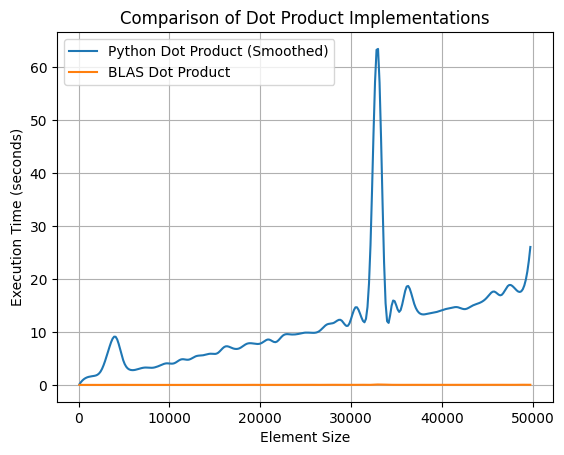

In [40]:
import numpy as np
import timeit
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Generate random numbers once
max_element_size = 50000
random_numbers_A = np.random.rand(max_element_size)
random_numbers_B = np.random.rand(max_element_size)

num_elements_list = np.arange(100, max_element_size, 800)

time_taken_list = []

# Increase the number of repetitions for more stable measurements
num_repetitions = 1000

for element_size in tqdm(num_elements_list):
    A = random_numbers_A[:element_size]
    B = random_numbers_B[:element_size]

    def blas_dot_product():
        return np.dot(A, B)

    def python_dot_product():
        return sum(a * b for a, b in zip(A, B))

    blas_time = timeit.timeit(blas_dot_product, number=num_repetitions)
    python_time = timeit.timeit(python_dot_product, number=num_repetitions)
    time_taken_list.append((blas_time, python_time))

In [52]:
time_taken_list.remove((0.019756900001084432, 25.537403199996334))
time_taken_list

[(0.004577300016535446, 0.13460739998845384),
 (0.007005199993727729, 1.4018745000066701),
 (0.008897799998521805, 1.7042004000104498),
 (0.005051699990872294, 2.744808599993121),
 (0.011827500013168901, 6.592797499994049),
 (0.010110699979122728, 9.055799800000386),
 (0.01657480001449585, 4.732196299999487),
 (0.009668100014096126, 2.846471199998632),
 (0.010895399987930432, 2.964965300023323),
 (0.005808599991723895, 3.2803074999828823),
 (0.007437899999786168, 3.2357419000181835),
 (0.006261700007598847, 3.6238646999991033),
 (0.005736599996453151, 4.0788248000026215),
 (0.006952099996851757, 4.07493840000825),
 (0.006598699983442202, 4.826017300016247),
 (0.010335099999792874, 4.763018799974816),
 (0.007052000000840053, 5.409466699988116),
 (0.008081600011792034, 5.599456800002372),
 (0.008930899988627061, 5.889754600008018),
 (0.009195399994496256, 6.0042865999857895),
 (0.012491499976022169, 7.230525899998611),
 (0.009763500012923032, 6.952464599977247),
 (0.00941110000712797, 6.

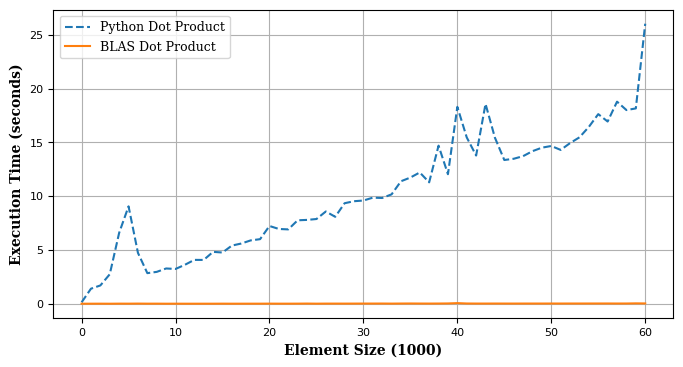

In [74]:
# Create a DataFrame with time measurements
df_data = pd.DataFrame(time_taken_list, columns=['BLAS', 'PYTHON'])

# Define font properties
font = {'family': 'serif', 'weight': 'bold', 'size': 10}

plt.figure(figsize = (8, 4))
# Plot BLAS and Python dot product data
plt.plot(df_data['PYTHON'], linestyle = "--", label="Python Dot Product")
plt.plot(df_data['BLAS'], label="BLAS Dot Product")


# Set font properties for x-label and y-label
plt.xlabel('Element Size (1000)', fontdict=font)
plt.ylabel('Execution Time (seconds)', fontdict=font)

# Set font properties for x-ticks and y-ticks
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

# Set font properties for legend
plt.legend(prop={'size': 9, 'family': 'serif'})

plt.grid(True)

# Show the plot
plt.savefig("./blas_vs_python_dot_product.png", dpi = 300, bbox_inches = 'tight')
plt.show()
